# Proyecto Final Parte I: Limpieza, análisis, visualización y kmeans

![Logo Tec](img/LogoTec2.jpg)

## Ciencia y analítica de datos (Gpo 10)
### Alumnos: 
* Armando Bringas Corpus (A01200230), 
* Walter André Hauri Rosales (A01794237)

### Profesores: 
* Dra. María de la Paz Rico Fernández
* Mtra. Victoria Guerrero Orozco

### Fecha: 16 de noviembre de 2022

In [1]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context ='notebook', ticks =True, grid =False) 

In [2]:
import geopandas as gpd
import numpy as np
%matplotlib inline
import matplotlib
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans

## Importación de los Datos

In [3]:
# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('data/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv',
                  encoding = "ISO-8859-1")
data.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,2020.0,6,Buena calidad,54.08,Contaminada,13.75,Excelente,1162,Contaminada,98,Excelente,NaN,NaN,NaN,NaN,46.8,Aceptable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,<1,No Toxico,NaN,NaN,Rojo,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,20,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,2020.0,NaN,NaN,NaN,NaN,13.9667,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,86.7,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,30,Excelente,NaN,NaN,96.2,Excelente,95.9,Excelente,95.5,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [5]:
data.tail()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
4136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.size

227755

In [7]:
data.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD',
       'PERIODO', 'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO',
       'SST_mg/L', 'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL',
       'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC', 'OD_PORC_SUP',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED', 'CALIDAD_OD_PORC_MED',
       'OD_PORC_FON', 'CALIDAD_OD_PORC_FON', 'TOX_D_48_UT', 'CALIDAD_TOX_D_48',
       'TOX_V_15_UT', 'CALIDAD_TOX_V_15', 'TOX_D_48_SUP_UT',
       'CALIDAD TOX_D_48_SUP', 'TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON',
       'TOX_FIS_SUP_15_UT', 'CALIDAD_TOX_FIS_SUP_15', 'TOX_FIS_FON_15_UT',
       'CALIDAD_TOX_FIS_FON_15', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
  

## Limpieza de los Datos

In [8]:
data.isnull().sum()

CLAVE                      648
SITIO                      648
ORGANISMO_DE_CUENCA        648
ESTADO                     648
MUNICIPIO                  648
CUENCA                     649
CUERPO DE AGUA             662
TIPO                       648
SUBTIPO                    662
LONGITUD                   648
LATITUD                    648
PERIODO                    648
DBO_mg/L                  1560
CALIDAD_DBO               1560
DQO_mg/L                  1560
CALIDAD_DQO               1560
SST_mg/L                   652
CALIDAD_SST                652
COLI_FEC_NMP_100mL        1559
CALIDAD_COLI_FEC          1559
E_COLI_NMP_100mL          1559
CALIDAD_E_COLI            1559
ENTEROC_NMP_100mL         3237
CALIDAD_ENTEROC           3237
OD_PORC                   2344
CALIDAD_OD_PORC           2344
OD_PORC_SUP               2522
CALIDAD_OD_PORC_SUP       2522
OD_PORC_MED               3654
CALIDAD_OD_PORC_MED       3654
OD_PORC_FON               3195
CALIDAD_OD_PORC_FON       3195
TOX_D_48

In [9]:
data.dropna(subset=['LONGITUD','LATITUD', 'SEMAFORO'], inplace=True)

In [10]:
data.size

192115

### Codificación de los datos categóricos

In [11]:
# Creación de objeto de LabelEncoder
label_encoder = preprocessing.LabelEncoder()
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data['SEMAFORO'])
label_encoder_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_encoder_name_mapping)

# Encode labels in column 'species'.
data['SEMAFORO']= label_encoder.fit_transform(data['SEMAFORO'])
data['SEMAFORO'].unique

{'Amarillo': 0, 'Rojo': 1, 'Verde': 2}


<bound method Series.unique of 0       1
1       2
2       2
3       2
4       2
       ..
3488    0
3489    1
3490    1
3491    0
3492    0
Name: SEMAFORO, Length: 3493, dtype: int32>

## Exploración de los Datos

### Medidas de Tendencias Central
 * Promedio (mean)
 * Mediana (50%)
### Medidas de Dispersión
 * Desviación Estándard (std)
 * Máximo (max)
 * Mínimo (min)
### Medidas de Posición No Centrales
 * Cuartiles (25%, 50%, 75%)
 * Outliers

In [12]:
data.describe()

,LONGITUD,LATITUD,PERIODO,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15,SEMAFORO
count,3493.000000,3493.000000,3493.0,0.0,0.0,0.0,0.0,3493.00000
mean,-100.359969,21.046992,2020.0,NaN,NaN,NaN,NaN,1.03779
std,6.122773,3.893696,0.0,NaN,NaN,NaN,NaN,0.82851
min,-117.124030,14.534910,2020.0,NaN,NaN,NaN,NaN,0.00000
25%,-103.882310,18.396070,2020.0,NaN,NaN,NaN,NaN,0.00000
50%,-99.795530,20.148980,2020.0,NaN,NaN,NaN,NaN,1.00000
75%,-96.860230,22.828930,2020.0,NaN,NaN,NaN,NaN,2.00000
max,-86.732150,32.706500,2020.0,NaN,NaN,NaN,NaN,2.00000


## Análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K-means 

### Método de Curva de Codo ('Elbow Curve Method')

In [13]:
columns = ['LONGITUD', 'LATITUD']
X = data[columns]
y = data['SEMAFORO']

In [14]:
distortions = []
for i in range(1, 8):
    k_means = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=2000,
        tol=1e-04, random_state=0
    )
    k_means.fit(X)
    distortions.append(k_means.inertia_)

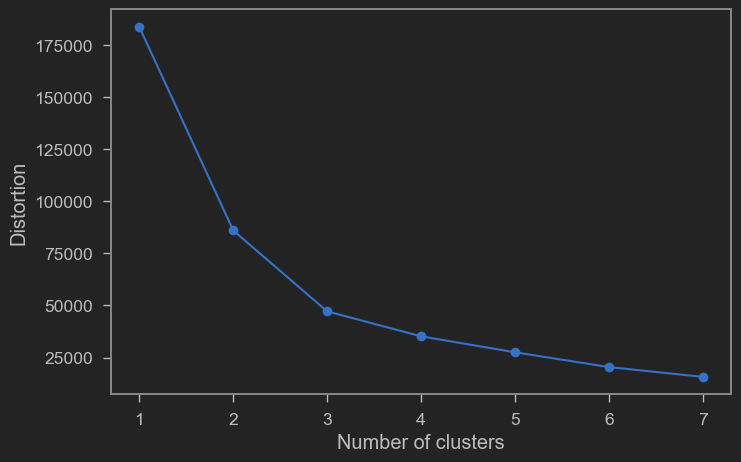

In [15]:
# Gráfica
plt.figure(figsize=(8,5))
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

###  Agrupamiento de latitudes y longitudes con K means

In [16]:
# Creación de los clústers
k = 3
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
y_pred = kmeans.predict(X)
y_pred

array([2, 1, 1, ..., 2, 2, 2])

### Resultados de agrupamiento de latitudes y longitudes

In [17]:
# Obtención de los centroides
centroids = kmeans.cluster_centers_
print(centroids)

[[ -93.47131781   17.89790126]
 [-110.64834892   27.69513598]
 [-101.05200614   20.84569401]]


## Resultados de agrupamiento de latitudes y longitudes con K-means en el mapa de México.

In [18]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

In [19]:
def plot_clusters(X, y_pred, k):
    if k == 3:
        assign_classes=['Agrupación 1', 'Agrupación 2', 'Agrupación 3']
        colors = ListedColormap(['r','b','g'])
    elif k == 5:
        assign_classes=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
        colors = ListedColormap(['r','g','b','yellow','m'])
    scatter = plt.scatter(
        data.loc[:, ['LONGITUD']], data.loc[:, ['LATITUD']],
        c=y_pred, cmap=colors, s=50)
    plt.legend(handles=scatter.legend_elements()[0], labels=assign_classes, markerscale=3, fontsize=20)
    plt.title('Agrupamiento de Sitios de Monitoreo del Agua', fontsize=25)
    plt.xlabel("Latitud")
    plt.ylabel("Longitud")

In [20]:
def plot_map_clusters(X, y_pred, k, centroids):
    fig, gax = plt.subplots()
    fig.set_figheight(15)
    fig.set_figwidth(15)
    world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='gray')
    plot_clusters(X, y_pred, k)
    plot_centroids(centroids)
    plt.gca().set_axisbelow(True)
    plt.show()

In [21]:
def plot_traffic_light(X, y):
    # {'Amarillo': 0, 'Rojo': 1, 'Verde': 2}
    colors = ListedColormap(['yellow','r','g'])
    scatter = plt.scatter(
    data.loc[:, ['LONGITUD']], data.loc[:, ['LATITUD']],
    c=y, cmap=colors, s=50)

In [22]:
def plot_map_boundaries(clusterer, X, y, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    fig, gax = plt.subplots()
    fig.set_figheight(15)
    fig.set_figwidth(15)
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Blues")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=0.5, colors='k')
    world.query("name == 'Mexico'").plot(ax = gax, color='gray', alpha=0.35)
    plot_centroids(clusterer.cluster_centers_)
    plot_traffic_light(X, y)
    plt.title('Sitios de Monitoreo del Agua', fontsize=25)
    plt.xlabel("Latitud")
    plt.ylabel("Longitud")
    plt.gca().set_axisbelow(True)
    plt.show()

### Visualización de Mapa de México

In [23]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

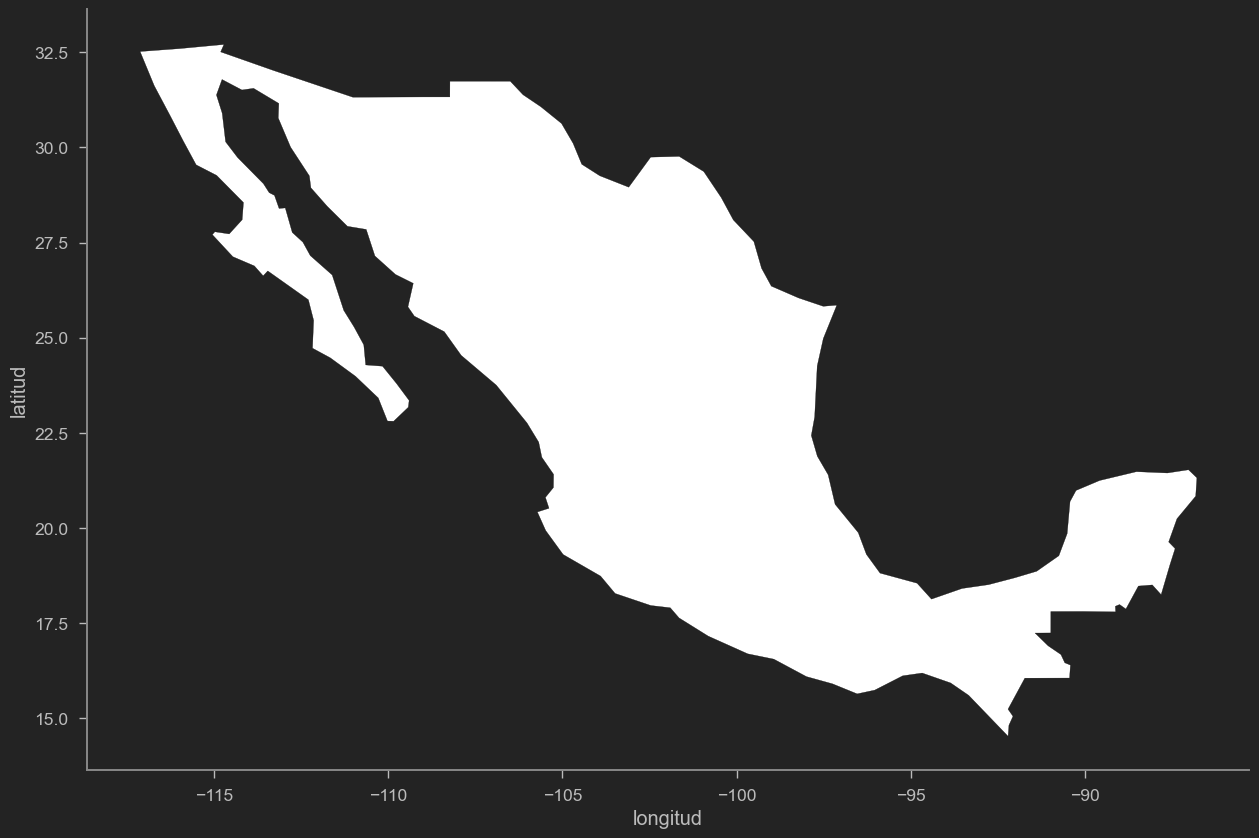

In [24]:
fig, gax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitud')
gax.set_ylabel('latitud')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

### Visualización de Agrupamientos por K-means

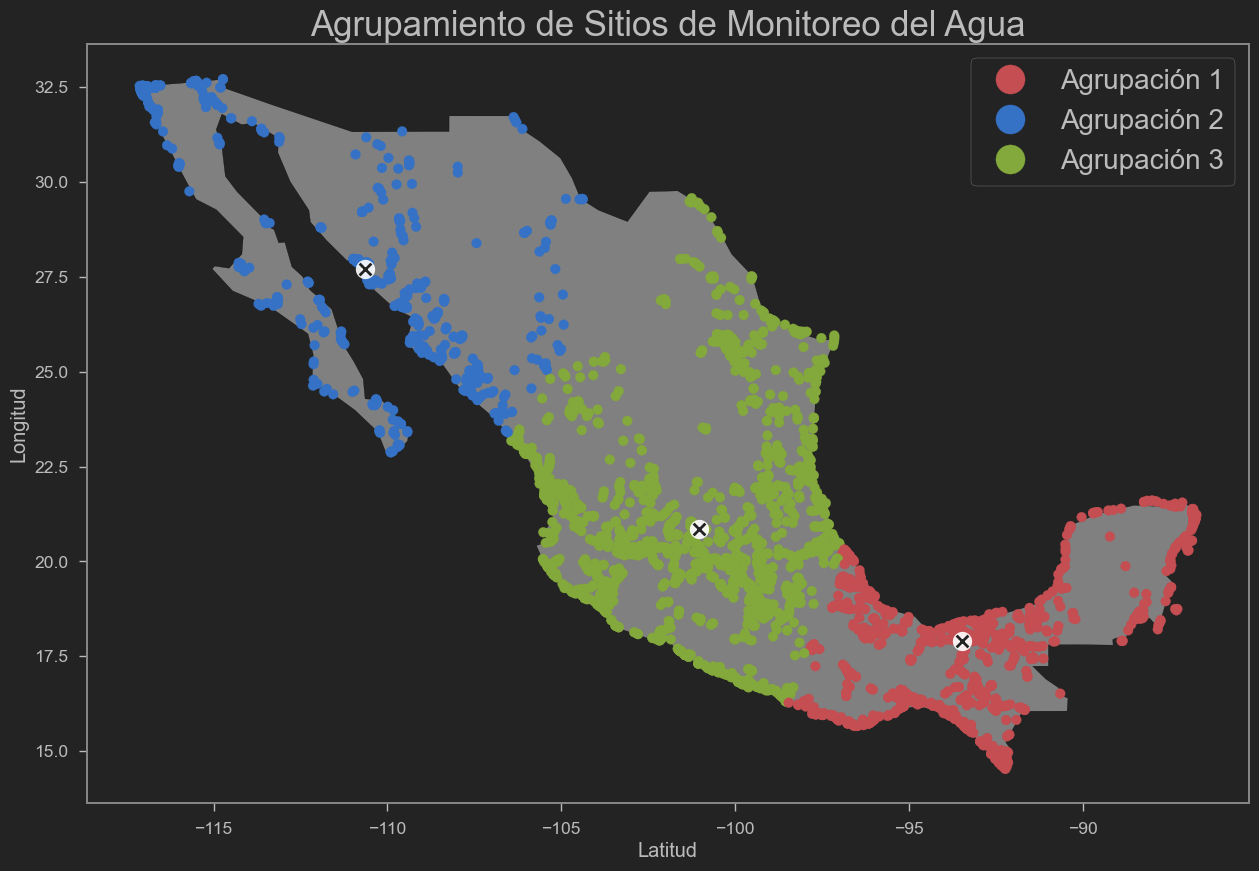

In [25]:
plot_map_clusters(X, y_pred, k, centroids)

In [26]:
X_array = X.to_numpy()
X_array

array([[-102.33911,   22.2473 ],
       [-109.8429 ,   22.90473],
       [-109.86442,   22.8988 ],
       ...,
       [ -99.50727,   27.49901],
       [ -99.52221,   27.49631],
       [ -99.52572,   27.51697]])

### Relación entre la calidad del agua y su ubicación geográfica a través de K- means.

C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


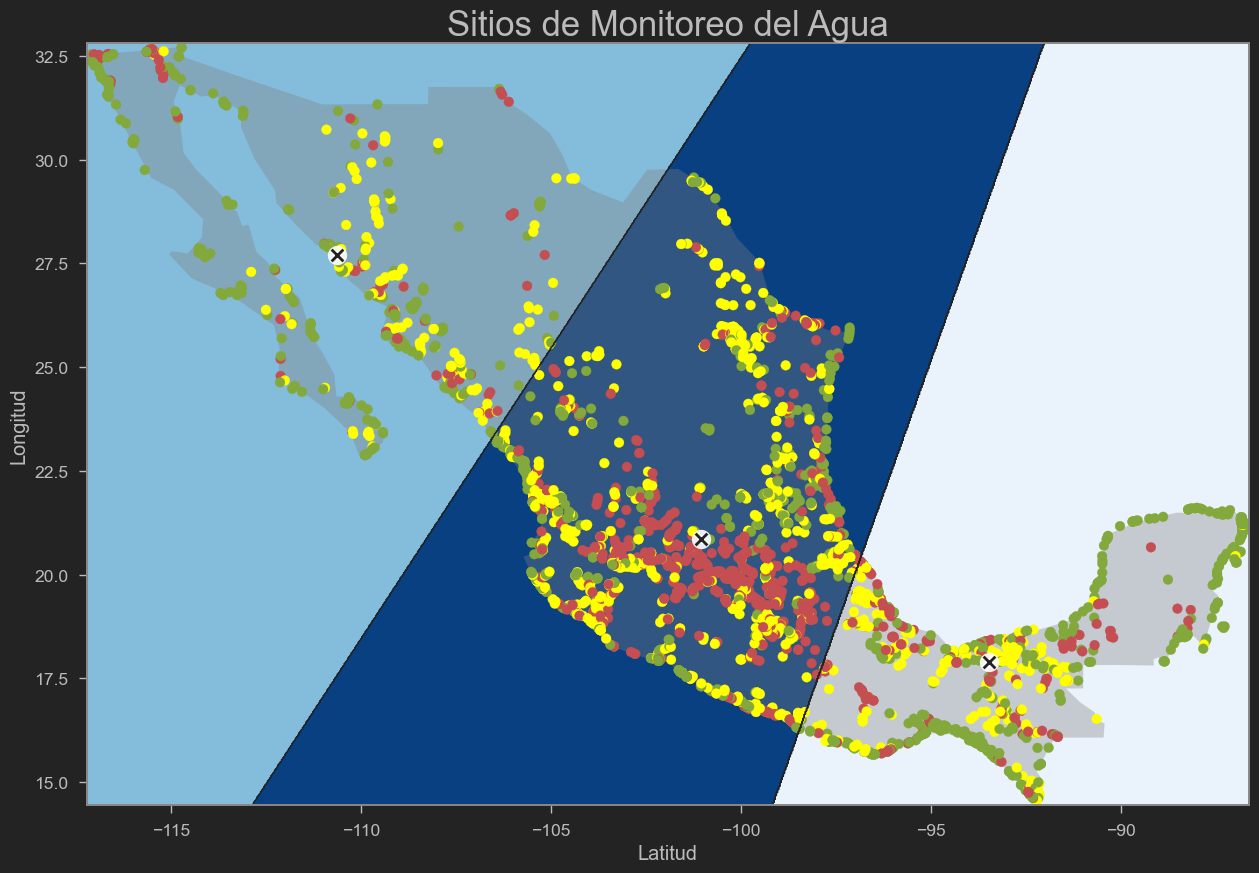

In [27]:
plot_map_boundaries(kmeans, X, y)